In [ ]:
'run this if you need to install networkx'
import sys
!{sys.executable} -m pip install networkx

In [5]:
'run this if you need to update networkx'
import sys
!{sys.executable} -m pip install --upgrade networkx

  Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [1]:
import numpy as np
import networkx as nx # package for graphs/networks
import matplotlib.pyplot as plt

In [2]:
'graph from its adjacency_matrix'
def graph_from_adj_matrix(adjacency_matrix, mylabels):
    adjacency_matrix = adjacency_matrix.T
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    graph = nx.DiGraph() #directed graph
    graph.add_edges_from(edges)
    nx.draw(graph, node_size=700,width=3, labels=mylabels, with_labels=True)
    plt.show()


In [35]:
A = np.array([[0,0,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,1,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0]])
mylabels = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f'}
A

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0]])

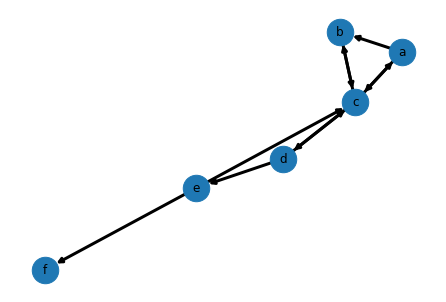

In [18]:
graph_from_adj_matrix(A,mylabels)

In [36]:
import scipy
def graph_centrality(A,alpha=0.85):
    Q = A.copy() # Q is a local variable
    n = Q.shape[0] 
    col_sum = np.sum(Q,axis=0) #column sum
    
    Q[:,col_sum==0] = 1    
    col_sum[col_sum==0]=n
    Q = Q/col_sum
    
    Q = alpha*Q + (1-alpha)*np.ones((n,n))/n
    
    'eigenvector with eigenvalue one'
    evalue, evector = scipy.sparse.linalg.eigs(Q,k=1,which='LM') # ‘LM’ : largest magnitude
    ecentrality = evector/np.sum(evector) #scale eigencentrality so that its entries add to 1
    return ecentrality.flatten()

In [37]:
graph_centrality(A)

array([0.13749436+0.j, 0.19592946+0.j, 0.35916269+0.j, 0.13749436+0.j,
       0.0941667 +0.j, 0.07575244+0.j])

In [38]:
A

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [23]:
'Example 2'
A = np.zeros((25,25))
A[0:6,0:6] = np.array([[0,0,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,1,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0]])
A[4,6:] = 1

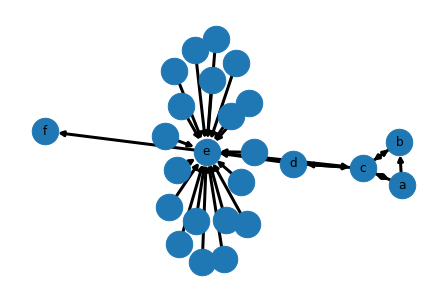

In [69]:
graph_from_adj_matrix(A, mylabels)

In [24]:
graph_centrality(A,alpha=0.85)

array([0.08321593+0.j, 0.11858271+0.j, 0.26170561+0.j, 0.08321593+0.j,
       0.19084885+0.j, 0.09017677+0.j, 0.00906601+0.j, 0.00906601+0.j,
       0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j,
       0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j,
       0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j,
       0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j, 0.00906601+0.j,
       0.00906601+0.j])

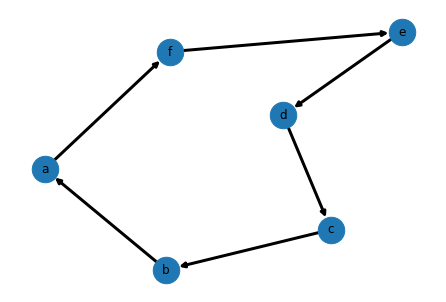

In [25]:
'Example 3'
A = np.array([[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[1,0,0,0,0,0]])
mylabels = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f'}
graph_from_adj_matrix(A,mylabels)

In [26]:
graph_centrality(A)

array([0.16666667-0.j, 0.16666667-0.j, 0.16666667-0.j, 0.16666667-0.j,
       0.16666667-0.j, 0.16666667-0.j])